# Materials Project API Examples

(Modified from [source](https://docs.materialsproject.org/downloading-data/using-the-api/examples))

Get your API key [here](https://next-gen.materialsproject.org/api).

### Task 1
Navigate to https://next-gen.materialsproject.org/ and filter based on:

- Composition: **Cr-Na-O** (Chemical System)
- Thermodynamics: **Stable** and **Experimentally Observed**

### Task 2
Next, try out the [interactive docs](https://api.materialsproject.org/docs) using the
same criteria as above. Note that "not theoretical" means "experimentally observed".

### Task 3
Finally, do the query programmatically using the Python API.

In [2]:
from mp_api import MPRester
api_key = "orz4wbjuuhmMX5b7VsYmNIQ7iYn3yfQY"

c:\Users\sterg\Miniconda3\envs\vienna\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
help(MPRester().summary.search)

c:\Users\sterg\Miniconda3\envs\vienna\lib\site-packages\mp_api\client.py:138: builtins.UserWarning: Problem loading MPContribs client: [<twisted.python.failure.Failure OpenSSL.SSL.Error: [('STORE routines', '', 'unregistered scheme'), ('system library', '', ''), ('STORE routines', '', 'unregistered scheme'), ('STORE routines', '', 'unsupported'), ('STORE routines', '', 'unregistered scheme'), ('system library', '', ''), ('STORE routines', '', 'unregistered scheme'), ('STORE routines', '', 'unsupported'), ('STORE routines', '', 'unregistered scheme'), ('system library', '', ''), ('STORE routines', '', 'unregistered scheme'), ('STORE routines', '', 'unsupported'), ('SSL routines', '', 'certificate verify failed')]>]


Help on method search in module mp_api.routes.summary:

search(band_gap: Optional[Tuple[float, float]] = None, chemsys: Union[str, List[str], NoneType] = None, crystal_system: Optional[emmet.core.symmetry.CrystalSystem] = None, density: Optional[Tuple[float, float]] = None, deprecated: Optional[bool] = None, e_electronic: Optional[Tuple[float, float]] = None, e_ionic: Optional[Tuple[float, float]] = None, e_total: Optional[Tuple[float, float]] = None, efermi: Optional[Tuple[float, float]] = None, elastic_anisotropy: Optional[Tuple[float, float]] = None, elements: Optional[List[str]] = None, energy_above_hull: Optional[Tuple[float, float]] = None, equilibrium_reaction_energy: Optional[Tuple[float, float]] = None, exclude_elements: Optional[List[str]] = None, formation_energy: Optional[Tuple[float, float]] = None, formula: Union[str, List[str], NoneType] = None, g_reuss: Optional[Tuple[float, float]] = None, g_voigt: Optional[Tuple[float, float]] = None, g_vrh: Optional[Tuple[float, floa

In [4]:
# # Task 3
# with MPRester(api_key) as mpr:
#     results = mpr.summary.search(fields=["material_id"]) # add appropriate kwargs

Retrieving SummaryDoc documents: 100%|██████████| 146323/146323 [00:20<00:00, 7082.77it/s]


## Other Examples

### Summary Queries

#### Structure data for silicon (mp-149)

In [6]:
with MPRester(api_key) as mpr:
    structure = mpr.get_structure_by_material_id("mp-149")
    
    # -- General search alternative:
    doc = mpr.summary.get_data_by_id("mp-149", fields=["structure"])
    structure = doc.structure
structure

c:\Users\sterg\Miniconda3\envs\vienna\lib\site-packages\mp_api\client.py:138: builtins.UserWarning: Problem loading MPContribs client: [<twisted.python.failure.Failure OpenSSL.SSL.Error: [('STORE routines', '', 'unregistered scheme'), ('system library', '', ''), ('STORE routines', '', 'unregistered scheme'), ('STORE routines', '', 'unsupported'), ('STORE routines', '', 'unregistered scheme'), ('system library', '', ''), ('STORE routines', '', 'unregistered scheme'), ('STORE routines', '', 'unsupported'), ('STORE routines', '', 'unregistered scheme'), ('system library', '', ''), ('STORE routines', '', 'unregistered scheme'), ('STORE routines', '', 'unsupported'), ('SSL routines', '', 'certificate verify failed')]>]
Retrieving SummaryDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]


Structure Summary
Lattice
    abc : 3.8669746532647453 3.8669746532647453 3.8669746532647453
 angles : 59.99999999999999 59.99999999999999 59.99999999999999
 volume : 40.88829284866483
      A : 0.0 2.734364 2.734364
      B : 2.734364 0.0 2.734364
      C : 2.734364 2.734364 0.0
    pbc : True True True
PeriodicSite: Si (1.3672, 1.3672, 1.3672) [0.2500, 0.2500, 0.2500]
PeriodicSite: Si (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]

#### Calculation (task) IDs for silicon (mp-149)

In [7]:
with MPRester(api_key) as mpr: 
    task_ids = mpr.get_task_ids_associated_with_material_id("mp-149")
    
    # -- General search alternative:
    doc = mpr.materials.get_data_by_id("mp-149", fields=["calc_types"])
    task_ids = doc.calc_types.keys()
    task_types = doc.calc_types.values()
task_ids

c:\Users\sterg\Miniconda3\envs\vienna\lib\site-packages\mp_api\client.py:138: builtins.UserWarning: Problem loading MPContribs client: [<twisted.python.failure.Failure OpenSSL.SSL.Error: [('STORE routines', '', 'unregistered scheme'), ('system library', '', ''), ('STORE routines', '', 'unregistered scheme'), ('STORE routines', '', 'unsupported'), ('STORE routines', '', 'unregistered scheme'), ('system library', '', ''), ('STORE routines', '', 'unregistered scheme'), ('STORE routines', '', 'unsupported'), ('STORE routines', '', 'unregistered scheme'), ('system library', '', ''), ('STORE routines', '', 'unregistered scheme'), ('STORE routines', '', 'unsupported'), ('SSL routines', '', 'certificate verify failed')]>]
Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]


dict_keys(['mp-655585', 'mp-656511', 'mp-655936', 'mp-11721', 'mp-149', 'mp-1057373', 'mp-1057366', 'mp-1057380', 'mp-1059585', 'mp-1059589', 'mp-1059603', 'mp-1120258', 'mp-1120259', 'mp-1141021', 'mp-1248038', 'mp-1249516', 'mp-1267607', 'mp-1440634', 'mp-1686587', 'mp-1791788', 'mp-1594776', 'mp-1592727', 'mp-1059604', 'mp-1057384'])

#### Band gaps for all materials containing _only_ Si and O

In [8]:
with MPRester(api_key) as mpr:
    docs = mpr.summary.search(chemsys="Si-O", 
                              fields=["material_id", "band_gap"])
    mpid_bgap_dict = {doc.material_id: doc.band_gap for doc in docs}
mpid_bgap_dict

c:\Users\sterg\Miniconda3\envs\vienna\lib\site-packages\mp_api\client.py:138: builtins.UserWarning: Problem loading MPContribs client: [<twisted.python.failure.Failure OpenSSL.SSL.Error: [('STORE routines', '', 'unregistered scheme'), ('system library', '', ''), ('STORE routines', '', 'unregistered scheme'), ('STORE routines', '', 'unsupported'), ('STORE routines', '', 'unregistered scheme'), ('system library', '', ''), ('STORE routines', '', 'unregistered scheme'), ('STORE routines', '', 'unsupported'), ('STORE routines', '', 'unregistered scheme'), ('system library', '', ''), ('STORE routines', '', 'unregistered scheme'), ('STORE routines', '', 'unsupported'), ('SSL routines', '', 'certificate verify failed')]>]
Retrieving SummaryDoc documents: 100%|██████████| 343/343 [00:00<?, ?it/s]


{MPID(mp-638035): 0.0,
 MPID(mp-560920): 5.613300000000001,
 MPID(mp-560064): 5.7691,
 MPID(mp-685105): 0.3892,
 MPID(mp-600071): 5.4719,
 MPID(mp-615993): 5.5573999999999995,
 MPID(mp-667383): 5.5162,
 MPID(mp-1249637): 5.7075,
 MPID(mp-16964): 5.6779,
 MPID(mp-556088): 5.8696,
 MPID(mp-1221354): 0.030199999999999783,
 MPID(mp-600098): 5.565899999999999,
 MPID(mp-12787): 5.6273,
 MPID(mp-600050): 5.8144,
 MPID(mp-555823): 1.3676000000000001,
 MPID(mp-600032): 5.7155000000000005,
 MPID(mp-557024): 5.6822,
 MPID(mp-7087): 5.3645000000000005,
 MPID(mp-600045): 5.4237,
 MPID(mp-557653): 4.0886000000000005,
 MPID(mp-1398433): 0.0,
 MPID(mp-559872): 5.610600000000001,
 MPID(mp-600057): 5.7215,
 MPID(mp-639705): 5.4988,
 MPID(mp-560203): 5.7301,
 MPID(mp-731864): 0.008799999999999919,
 MPID(mp-639480): 5.6231,
 MPID(mp-546546): 5.5604000000000005,
 MPID(mp-555394): 4.0687,
 MPID(mp-556985): 5.6098,
 MPID(mp-7000): 5.7194,
 MPID(mp-638900): 0.10310000000000041,
 MPID(mp-557873): 5.6607,
 MPID

#### Chemical formulas for all materials containing _at least_ Si and O

In [18]:
with MPRester(api_key) as mpr:
    docs = mpr.summary.search(elements=["Si", "O"], 
                              fields=["material_id", "formula_pretty", "band_gap"])
    mpid_formula_dict = {doc.material_id: doc.formula_pretty for doc in docs}
mpid_formula_dict

c:\Users\sterg\Miniconda3\envs\vienna\lib\site-packages\mp_api\client.py:138: builtins.UserWarning: Problem loading MPContribs client: [<twisted.python.failure.Failure OpenSSL.SSL.Error: [('STORE routines', '', 'unregistered scheme'), ('system library', '', ''), ('STORE routines', '', 'unregistered scheme'), ('STORE routines', '', 'unsupported'), ('STORE routines', '', 'unregistered scheme'), ('system library', '', ''), ('STORE routines', '', 'unregistered scheme'), ('STORE routines', '', 'unsupported'), ('STORE routines', '', 'unregistered scheme'), ('system library', '', ''), ('STORE routines', '', 'unregistered scheme'), ('STORE routines', '', 'unsupported'), ('SSL routines', '', 'certificate verify failed')]>]
Retrieving SummaryDoc documents: 100%|██████████| 4967/4967 [00:02<00:00, 2359.66it/s]


{MPID(mp-23764): 'Mg3Si2H4O9',
 MPID(mp-555976): 'Na2TiSiO5',
 MPID(mp-1264119): 'Yb3Si2ClO8',
 MPID(mp-758325): 'Li2CuSiO4',
 MPID(mp-1293053): 'MgMnSiO5',
 MPID(mp-1207610): 'Yb2Be2SiO7',
 MPID(mp-1227994): 'BaAlSi5N7O2',
 MPID(mp-40134): 'ZnSiH12(OF)6',
 MPID(mp-1039915): 'NaMg30SiO32',
 MPID(mp-1250148): 'Na5(SiO3)6',
 MPID(mp-1196647): 'Nd13Mg2Si4B8O43',
 MPID(mp-6316): 'Er4Si2S3O7',
 MPID(mp-1191756): 'FeSiO4',
 MPID(mp-560885): 'CaSiO3',
 MPID(mp-1223669): 'KAl3(SiO4)3',
 MPID(mp-753530): 'Li2Mn2Si2O7',
 MPID(mp-1034756): 'Mg14NbSiO16',
 MPID(mp-1038016): 'CaMg30SiO32',
 MPID(mp-1265277): 'Ca3Mn2(SiO4)3',
 MPID(mp-1133299): 'CaV(SiO3)2',
 MPID(mp-510635): 'KNa2LiTi2Fe2(SiO3)8',
 MPID(mp-1295198): 'Li2Fe2Si2O7',
 MPID(mp-1080186): 'CaAl2Si3O10',
 MPID(mp-772595): 'NaSiSbCO7',
 MPID(mp-554905): 'CaZnSi3O8',
 MPID(mp-1194160): 'BaHf(SiO3)3',
 MPID(mp-769543): 'Li3Mn2(SiO4)2',
 MPID(mp-559532): 'NaFe3Si3O10',
 MPID(mp-554159): 'Li2BeSiO4',
 MPID(mp-23492): 'Si(Bi3O5)4',
 MPID(mp-121

### Stable materials (on the hull) with large band gaps (>3eV)

In [21]:
with MPRester(api_key) as mpr:
    docs = mpr.summary.search(band_gap=(3,None),
                              is_stable=True, 
                              fields=["material_id"])
    stable_mpids = [doc.material_id for doc in docs]
    print(stable_mpids[0:10])
    
    ## -- Alternative directly using energy above hull:
    docs = mpr.summary.search(band_gap=(3,None),
                              energy_above_hull=(0,0),
                              fields=["material_id"])
    stable_mpids = [doc.material_id for doc in docs]
    print(stable_mpids[0:10])

c:\Users\sterg\Miniconda3\envs\vienna\lib\site-packages\mp_api\client.py:138: builtins.UserWarning: Problem loading MPContribs client: [<twisted.python.failure.Failure OpenSSL.SSL.Error: [('STORE routines', '', 'unregistered scheme'), ('system library', '', ''), ('STORE routines', '', 'unregistered scheme'), ('STORE routines', '', 'unsupported'), ('STORE routines', '', 'unregistered scheme'), ('system library', '', ''), ('STORE routines', '', 'unregistered scheme'), ('STORE routines', '', 'unsupported'), ('STORE routines', '', 'unregistered scheme'), ('system library', '', ''), ('STORE routines', '', 'unregistered scheme'), ('STORE routines', '', 'unsupported'), ('SSL routines', '', 'certificate verify failed')]>]
Retrieving SummaryDoc documents: 100%|██████████| 6218/6218 [00:02<00:00, 2492.23it/s]


[MPID(mp-1195170), MPID(mp-1182406), MPID(mp-1201606), MPID(mp-554259), MPID(mp-1206844), MPID(mp-558566), MPID(mp-1275487), MPID(mp-1112792), MPID(mp-24266), MPID(mp-555207)]


Retrieving SummaryDoc documents: 100%|██████████| 6218/6218 [00:01<00:00, 4605.93it/s]

[MPID(mp-1195170), MPID(mp-1182406), MPID(mp-1201606), MPID(mp-554259), MPID(mp-1206844), MPID(mp-558566), MPID(mp-1275487), MPID(mp-1112792), MPID(mp-24266), MPID(mp-555207)]


### Electronic Structure

#### Band structures for silicon (mp-149)

In [82]:
from pymatgen.electronic_structure.plotter import DosPlotter, BSPlotter, BSDOSPlotter
mpid = "mp-149"

c:\Users\sterg\Miniconda3\envs\vienna\lib\site-packages\mp_api\client.py:138: builtins.UserWarning: Problem loading MPContribs client: [<twisted.python.failure.Failure OpenSSL.SSL.Error: [('STORE routines', '', 'unregistered scheme'), ('system library', '', ''), ('STORE routines', '', 'unregistered scheme'), ('STORE routines', '', 'unsupported'), ('STORE routines', '', 'unregistered scheme'), ('system library', '', ''), ('STORE routines', '', 'unregistered scheme'), ('STORE routines', '', 'unsupported'), ('STORE routines', '', 'unregistered scheme'), ('system library', '', ''), ('STORE routines', '', 'unregistered scheme'), ('STORE routines', '', 'unsupported'), ('SSL routines', '', 'certificate verify failed')]>]
Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]


<module 'matplotlib.pyplot' from 'c:\\Users\\sterg\\Miniconda3\\envs\\vienna\\lib\\site-packages\\matplotlib\\pyplot.py'>

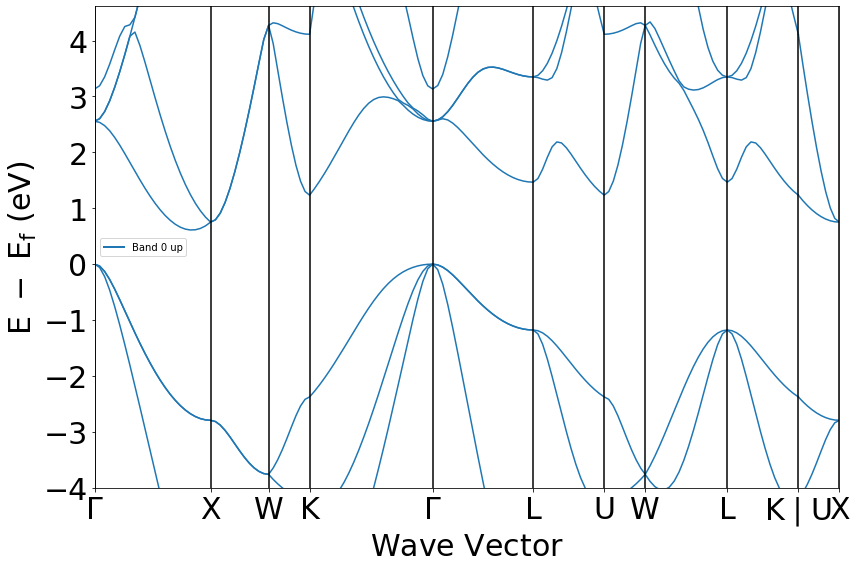

In [85]:
from emmet.core.electronic_structure import BSPathType
with MPRester(api_key) as mpr:
    # -- line-mode, Setyawan-Curtarolo (default):
    bs_sc = mpr.get_bandstructure_by_material_id(mpid)
    
    # # -- line-mode, Hinuma et al.:
    # bs_hin = mpr.get_bandstructure_by_material_id("mp-149", path_type=BSPathType.hinuma)
    # # -- line-mode, Latimer-Munro:
    # bs_lat = mpr.get_bandstructure_by_material_id("mp-149", path_type=BSPathType.latimer_munro)
    
    # # -- uniform:
    # bs_uniform = mpr.get_bandstructure_by_material_id("mp-149", line_mode=False)

BSPlotter(bs_sc).get_plot()

#### Density of states for silicon (mp-149)

Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<?, ?it/s]


<module 'matplotlib.pyplot' from 'c:\\Users\\sterg\\Miniconda3\\envs\\vienna\\lib\\site-packages\\matplotlib\\pyplot.py'>

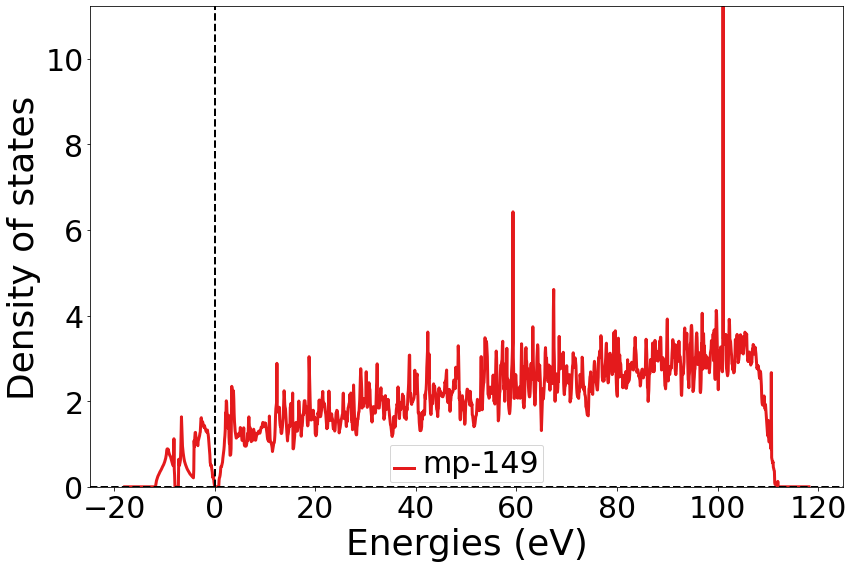

In [86]:
with MPRester(api_key) as mpr:
    dos = mpr.get_dos_by_material_id(mpid)

plotter = DosPlotter()
plotter.add_dos(mpid, dos)
plotter.get_plot()

#### Combined

<module 'matplotlib.pyplot' from 'c:\\Users\\sterg\\Miniconda3\\envs\\vienna\\lib\\site-packages\\matplotlib\\pyplot.py'>

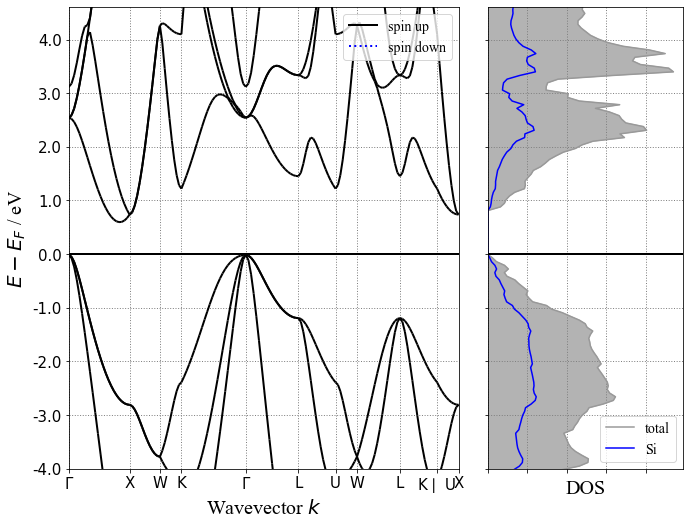

In [87]:
BSDOSPlotter().get_plot(bs_sc, dos)

### Phonons

In [36]:
from pymatgen.phonon.plotter import PhononBSPlotter, PhononDosPlotter

#### Band structure for silicon (mp-149)

Retrieving PhononBSDOSDoc documents: 100%|██████████| 1/1 [00:00<00:00, 1002.22it/s]


<module 'matplotlib.pyplot' from 'c:\\Users\\sterg\\Miniconda3\\envs\\vienna\\lib\\site-packages\\matplotlib\\pyplot.py'>

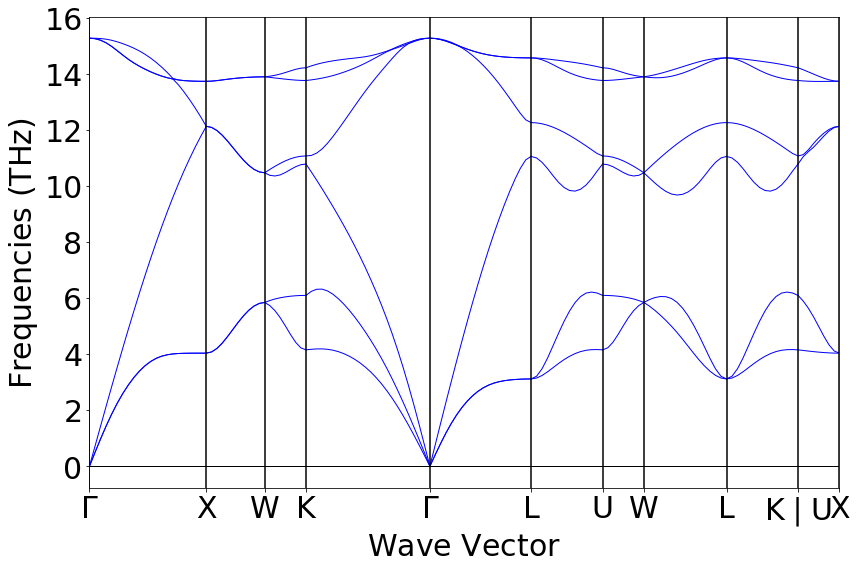

In [35]:
with MPRester(api_key) as mpr:
    ph_bs = mpr.get_phonon_bandstructure_by_material_id(mpid)
    
PhononBSPlotter(ph_bs).get_plot()

#### Density of states for silicon (mp-149)

Retrieving PhononBSDOSDoc documents: 100%|██████████| 1/1 [00:00<00:00, 1000.07it/s]


<module 'matplotlib.pyplot' from 'c:\\Users\\sterg\\Miniconda3\\envs\\vienna\\lib\\site-packages\\matplotlib\\pyplot.py'>

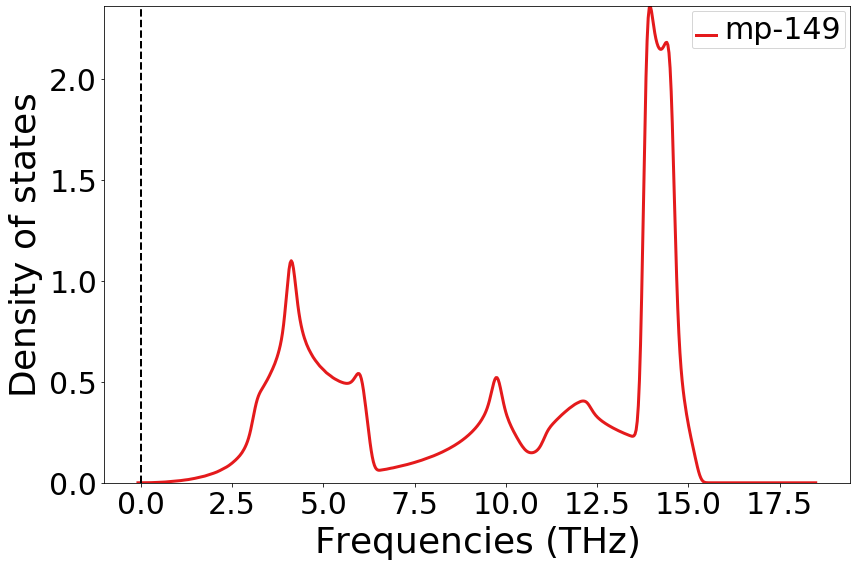

In [38]:
from emmet.core.electronic_structure import BSPathType
with MPRester(api_key) as mpr:
    ph_dos = mpr.get_phonon_dos_by_material_id(mpid)

plotter = PhononDosPlotter()
plotter.add_dos(mpid, ph_dos)
plotter.get_plot()

### XAS

In [53]:
xas[0].spectrum

Ti K Edge XANES for TiO2: XAS
Energy: [4967.802 4968.265 4968.68  4969.046 4969.363 4969.631 4969.85  4970.021
 4970.04  4970.14  4970.24  4970.34  4970.44  4970.54  4970.64  4970.734
 4970.85  4970.978 4971.118 4971.271 4971.435 4971.612 4971.801 4972.002
 4972.215 4972.441 4972.679 4972.929 4973.191 4973.465 4973.752 4974.05
 4974.361 4974.684 4975.02  4975.367 4975.727 4976.099 4976.483 4976.879
 4977.287 4977.708 4978.141 4978.586 4979.043 4979.512 4979.994 4980.488
 4980.994 4981.512 4982.042 4982.585 4983.139 4983.706 4984.286 4984.877
 4985.48  4986.096 4986.724 4987.364 4988.016 4988.681 4989.357 4990.046
 4990.747 4991.46  4992.186 4992.924 4993.673 4994.435 4995.21  4995.996
 4996.794 4997.605 4998.428 4999.263 5000.111 5000.97  5001.842 5002.726
 5003.622 5004.53  5005.451 5006.383 5007.328 5008.285 5009.255 5010.236
 5011.23  5012.236 5013.254 5014.284 5015.326 5016.381 5017.448 5018.527
 5019.618 5020.721 5021.837 5022.964]
Intensity: [0.028581  0.0340093 0.0412138 0.05096

In [41]:
from pymatgen.vis.plotters import SpectrumPlotter

#### XAS for TiO2 element O K edge:&#x20;

In [75]:
xas[0].material_id.string

'mp-1044853'

Retrieving XASDoc documents: 100%|██████████| 99/99 [00:00<00:00, 103087.41it/s]


<module 'matplotlib.pyplot' from 'c:\\Users\\sterg\\Miniconda3\\envs\\vienna\\lib\\site-packages\\matplotlib\\pyplot.py'>

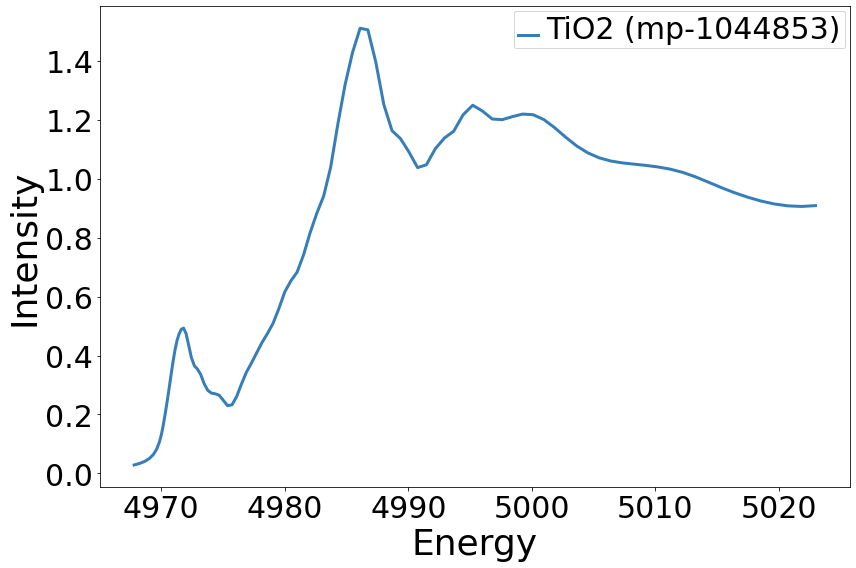

In [78]:
from emmet.core.xas import Edge, XASDoc, Type
with MPRester(api_key) as mpr:
    xas = mpr.xas.search(formula = "TiO2", 
                                    absorbing_element = 'Ti', 
                                    edge = Edge.K)

plotter = SpectrumPlotter()
spectra = [doc.spectrum for doc in xas]
spectra_dict = {str(i): x for i, x in enumerate(spectra)}.keys()
plotter.add_spectrum(f"TiO2 ({xas[0].material_id.string})", xas[0].spectrum)
plotter.get_plot()

### Charge Density

#### Charge density for silicon (mp-149)

In [81]:
with MPRester(api_key) as mpr:
    chgcar = mpr.get_charge_density_from_material_id(mpid)
    
chgcar

c:\Users\sterg\Miniconda3\envs\vienna\lib\site-packages\mp_api\client.py:138: builtins.UserWarning: Problem loading MPContribs client: [<twisted.python.failure.Failure OpenSSL.SSL.Error: [('STORE routines', '', 'unregistered scheme'), ('system library', '', ''), ('STORE routines', '', 'unregistered scheme'), ('STORE routines', '', 'unsupported'), ('STORE routines', '', 'unregistered scheme'), ('system library', '', ''), ('STORE routines', '', 'unregistered scheme'), ('STORE routines', '', 'unsupported'), ('STORE routines', '', 'unregistered scheme'), ('system library', '', ''), ('STORE routines', '', 'unregistered scheme'), ('STORE routines', '', 'unsupported'), ('SSL routines', '', 'certificate verify failed')]>]
Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<00:00, 1001.27it/s]


MPRestError: REST query returned with error status code 403 on URL https://api.materialsproject.org/charge_density/?task_ids=mp-655585&task_ids=mp-1057373&task_ids=mp-1059589&task_ids=mp-1440634&task_ids=mp-1791788&_limit=10&_fields=last_updated%2Ctask_id%2Cfs_id with message:
Response {
  "message":"You cannot consume this service"
}